In [1]:
!pip install opencv-python-headless
!pip install transformers
!pip install -qq opencv-contrib-python diffusers transformers git+https://github.com/huggingface/accelerate.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from diffusers.utils import load_image
import urllib.request

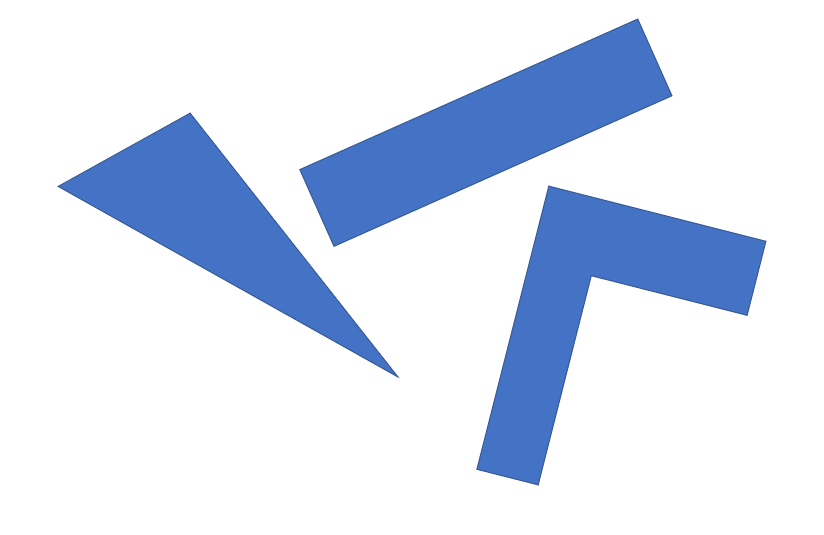

In [3]:
samimg = load_image('/content/sample.png')
samimg

In [4]:
img = np.array(samimg)

In [153]:
originImg = img.copy()

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
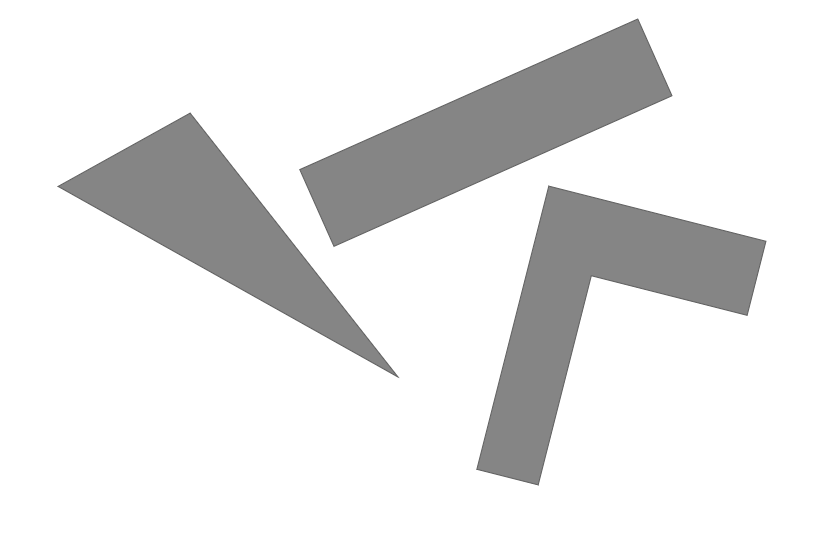

In [96]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
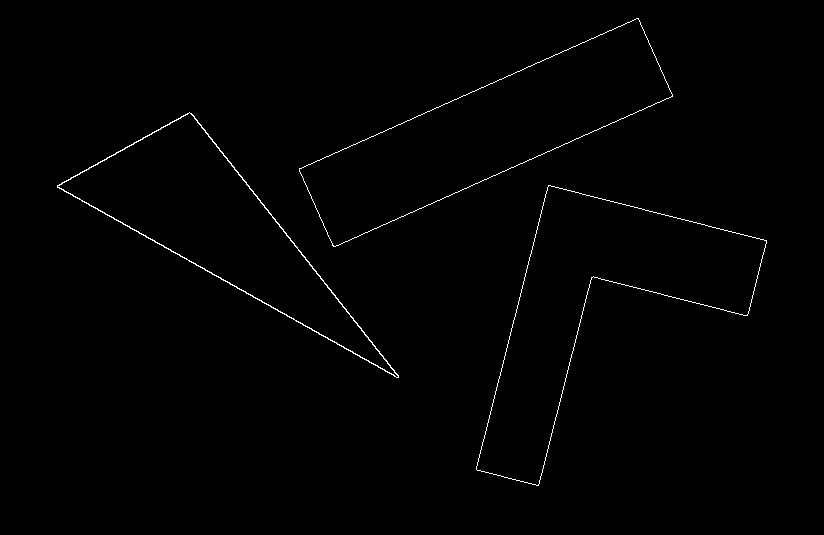

In [97]:
img_canny = cv2.Canny(img_gray,50, 150, apertureSize=3)
img_canny

In [98]:
dst = cv2.cornerHarris(img_gray, blockSize=2, ksize=3, k=0.04)

In [99]:
dst = cv2.dilate(dst, None)

In [100]:
tmp = img.copy()
tmp[dst > 0.01 * dst.max()] = [0, 0, 0]

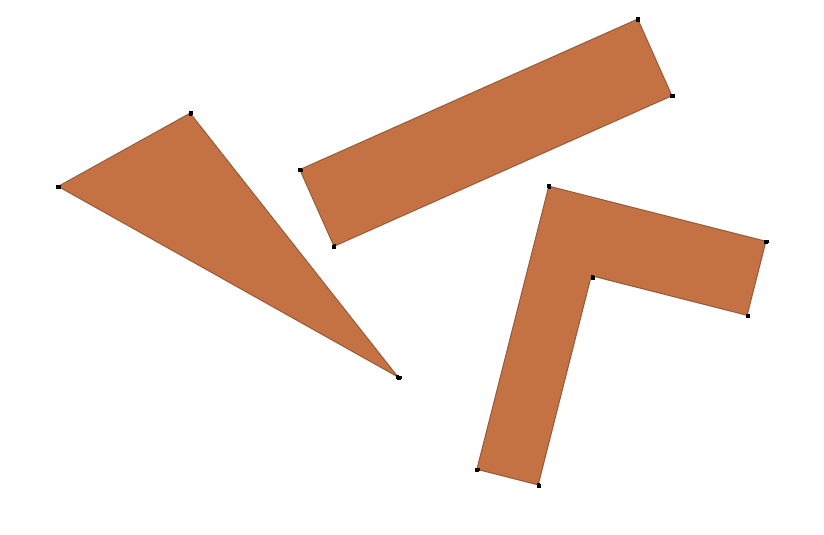

In [101]:
cv2_imshow(tmp)

In [ ]:
import numpy as np
import cv2

def hessian_laplace_detector(image, min_scale=1, max_scale=10, num_scales=5, threshold=0.03):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    keypoints = []
    scales = np.linspace(min_scale, max_scale, num_scales)

    for sigma in scales:
        # 가우시안 블러 적용
        blurred = cv2.GaussianBlur(gray, (0, 0), sigma)

        # 2차 미분 계산
        Lxx = cv2.Sobel(blurred, cv2.CV_64F, 2, 0, ksize=3)
        Lyy = cv2.Sobel(blurred, cv2.CV_64F, 0, 2, ksize=3)
        Lxy = cv2.Sobel(blurred, cv2.CV_64F, 1, 1, ksize=3)

        # Hessian 행렬식 계산
        det_hessian = Lxx * Lyy - Lxy**2

        # Laplacian 계산
        laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

        # 스케일 정규화된 Laplacian
        norm_laplacian = sigma**2 * np.abs(laplacian)

        # 특징점 검출
        for i in range(1, det_hessian.shape[0]-1):
            for j in range(1, det_hessian.shape[1]-1):
                if det_hessian[i,j] > threshold * det_hessian.max():
                    if np.all(det_hessian[i,j] >= det_hessian[i-1:i+2, j-1:j+2]):
                        if np.all(norm_laplacian[i,j] >= norm_laplacian[i-1:i+2, j-1:j+2]):
                            keypoints.append((j, i, sigma))

    return keypoints

# 사용 예
image = cv2.imread('image.jpg')
keypoints = hessian_laplace_detector(image)

# 결과 시각화
for kp in keypoints:
    x, y, sigma = kp
    cv2.circle(image, (int(x), int(y)), int(sigma), (0, 255, 0), 1)

cv2.imshow('Hessian-Laplace Keypoints', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# import numpy as np
# import cv2

def hessian_laplace_detector(image, min_scale=1, max_scale=10, num_scales=5, threshold=0.03):
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # gray = np.float32(gray)

    targetpoints = []
    scales = np.linspace(min_scale, max_scale, num_scales)

    for sigma in scales:
        # 가우시안 블러 적용
        # blurred = cv2.GaussianBlur(gray, (0, 0), sigma)

        # 2차 미분 계산
        Lxx = cv2.Sobel(image, cv2.CV_64F, 2, 0, ksize=3)
        Lyy = cv2.Sobel(image, cv2.CV_64F, 0, 2, ksize=3)
        Lxy = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)

        # Hessian 행렬식 계산
        det_hessian = Lxx * Lyy - Lxy**2

        # Laplacian 계산
        laplacian = cv2.Laplacian(image, cv2.CV_64F)

        # 스케일 정규화된 Laplacian
        norm_laplacian = sigma**2 * np.abs(laplacian)

        # 특징점 검출
        for i in range(1, det_hessian.shape[0]-1):
            for j in range(1, det_hessian.shape[1]-1):
                if det_hessian[i,j] > threshold * det_hessian.max():
                    if np.all(det_hessian[i,j] >= det_hessian[i-1:i+2, j-1:j+2]):
                        if np.all(norm_laplacian[i,j] >= norm_laplacian[i-1:i+2, j-1:j+2]):
                            targetpoints.append((j, i, sigma))

    return targetpoints

# # 사용 예
image = cv2.imread('sample.png')
targetpoints = hessian_laplace_detector(image)

# 결과 시각화
for kp in targetpoints:
    x, y, sigma = kp
    cv2.circle(image, (int(x), int(y)), int(sigma), (0, 255, 0), 1)

cv2.imshow('Hessian-Laplace targetpoints', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 사용 예
# image = cv2.imread('sample.png')
# image = image.astype('uint8')
image = np.array(samimg)
keypoints = hessian_laplace_detector(image)

# 결과 시각화
for kp in keypoints:
    x, y, sigma = kp
    cv2.circle(image, (int(x), int(y)), int(sigma), (0, 255, 0), 1)

cv2.imshow('Hessian-Laplace Keypoints', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [72]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# Harris Corner Detector 함수
def harris_corners(image, k=0.04, threshold=0.01):
    # 이미지 크기
    height, width = image.shape

    # x, y 방향의 Sobel 필터 적용
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # 곱의 외적 계산
    Ixx = sobel_x ** 2
    Iyy = sobel_y ** 2
    Ixy = sobel_x * sobel_y

    # 가우시안 블러 적용 (커널 크기 3x3)
    Ixx = cv2.GaussianBlur(Ixx, (3, 3), 0)
    Iyy = cv2.GaussianBlur(Iyy, (3, 3), 0)
    Ixy = cv2.GaussianBlur(Ixy, (3, 3), 0)

    # Harris 행렬 M의 결정식 계산
    det_M = (Ixx * Iyy) - (Ixy ** 2)
    trace_M = Ixx + Iyy

    # Harris 응답 함수 R 계산
    R = det_M - k * (trace_M ** 2)

    # 코너 포인트 찾기
    corners = np.zeros_like(R)
    corners[R > threshold * R.max()] = 255

    return corners.astype(np.uint8), R

# # 이미지 로드 및 처리
# image = load_image('sample.png')
# corners, R = harris_corners(image)

# # 결과 시각화
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(image, cmap='gray')
# plt.title('Original Image')

# plt.subplot(1, 2, 2)
# plt.imshow(corners, cmap='gray')
# plt.title('Harris Corners')

# plt.show()


In [125]:
# Harris Corner Detector

def harris_corners(image, patch = 2, sobelOperator = 3, k=0.04, T=0.01):

    # x, y 방향의 Sobel 필터 적용
    if(sobelOperator % 2 == 0):
      sobelOperator += 1

    dx = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize = sobelOperator)
    dy = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize = sobelOperator)

    # cross product
    dxdx = dx ** 2
    dydy = dy ** 2
    dxdy = dx * dy

    # Gaussian blur : 3x3 kernel
    dxdx = cv2.GaussianBlur(dxdx, (3, 3), 0)
    dydy = cv2.GaussianBlur(dydy, (3, 3), 0)
    dxdy = cv2.GaussianBlur(dxdy, (3, 3), 0)

    # Dertermainant, Trace
    Det = (dxdx * dydy) - (dxdy ** 2)
    Tr = dxdx + dydy

    # Harris 응답 함수 R 계산
    R = Det - k * (Tr ** 2)

    # 코너 포인트 찾기
    corners = np.zeros_like(R)
    # R = abs(R)
    corners[R > T * R.max()] = 1

    # return corners.astype(np.uint8), R
    return corners, R

In [126]:
corners, R = harris_corners(img_gray, sobelOperator =5)

In [137]:
corners[0].shape


(824,)

In [130]:
corners.shape

(535, 824)

In [144]:
range(corners.shape[0])

range(0, 535)

In [131]:
cnt = 0
for cor in corners:
  cnt +=1
  a = False
  for val in cor:
    if(val ==1):
      a=True
      print(cnt)
      break

  # if(a):
  #   continue


18
19
20
21
95
96
97
112
113
114
115
169
170
171
185
186
187
188
241
242
243
245
246
247
248
277
278
279
280
314
315
316
317
375
376
377
378
379
469
470
471
484
485
486
487


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
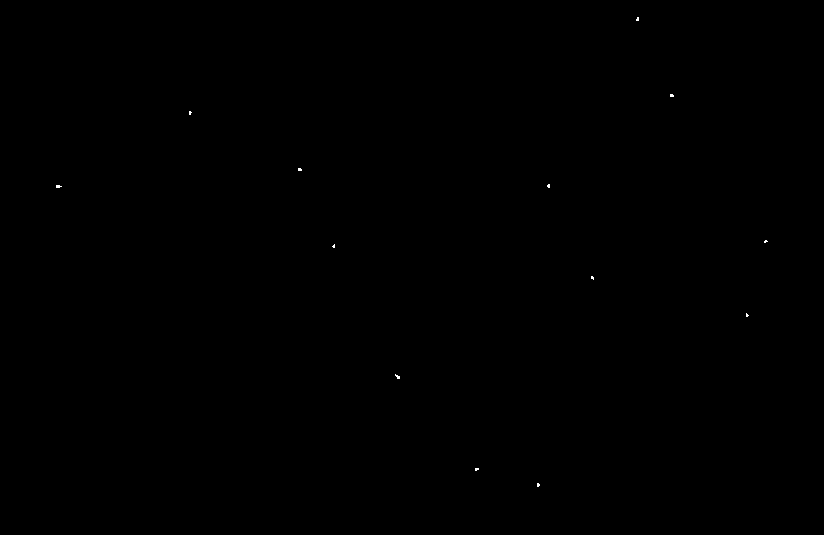

In [121]:
corners.astype(np.uint8)

In [154]:
def DrawHarrisCorner(points, image = None):
  #line만 그리고 싶은 경우
  if image is None:
    image = np.ones(originImg.shape, dtype=np.uint8) * 255

  height = range(points.shape[0])
  width = range(points.shape[1])
  for y in height:
    for x in width:
      if(points[y, x] ==1):
        cv2.circle(image, (x, y), radius =1, color = (0, 0, 0), thickness=-1)

  return image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
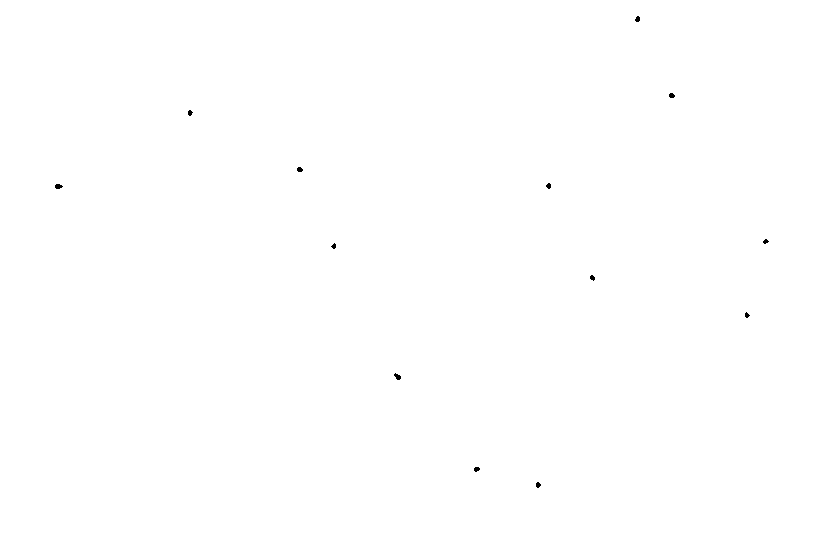

In [155]:
DrawHarrisCorner(corners)

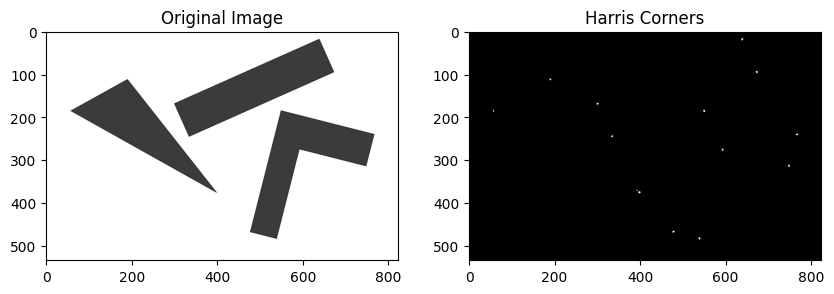

In [104]:
# image = load_image('sample.png')
# corners, R = harris_corners(img_gray)
# corners = harris_corners(img_gray)
corners = harris_corners(img_gray)

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(corners, cmap='gray')
plt.title('Harris Corners')

plt.show()